C:\Users\15rd167\AppData\Local\conda\conda\envs\deeplearning_python3.6\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 77us/step - loss: 0.1885 - acc: 0.9431 - val_loss: 0.0550 - val_acc: 0.9837
Epoch 2/20
48000/48000 [==============================] - 3s 66us/step - loss: 0.0483 - acc: 0.9856 - val_loss: 0.0474 - val_acc: 0.9856
Epoch 3/20
48000/48000 [==============================] - 3s 61us/step - loss: 0.0321 - acc: 0.9901 - val_loss: 0.0323 - val_acc: 0.9906
Epoch 4/20
48000/48000 [==============================] - 3s 68us/step - loss: 0.0243 - acc: 0.9921 - val_loss: 0.0333 - val_acc: 0.9900
Epoch 5/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0363 - val_acc: 0.9897
Epoch 6/20
48000/48000 [==============================] - 3s 66us/step - loss: 0.0134 - acc: 0.9952 - val_loss: 0.0350 - val_acc: 0.9901
Epoch 7/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.0107 - acc: 0.9963 - val_loss: 0.0354 - val_acc

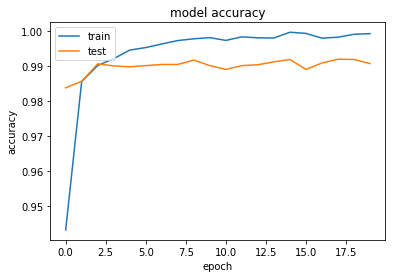

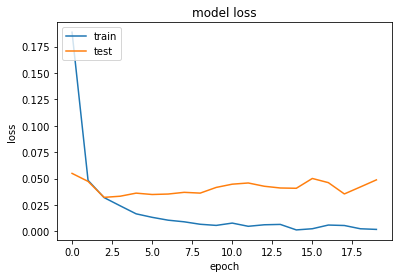

In [18]:
from keras import backend as K
from keras.datasets import mnist
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant
from keras.optimizers import Adam
import matplotlib.pyplot as plt
 
#load_mnistはutilsにある
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
 
y_test = np_utils.to_categorical(y_test, 10)
y_train = np_utils.to_categorical(y_train, 10)
 
K.set_image_dim_ordering("th")
#LeNetを構築する
model = Sequential()
model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=(1,28,28)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
 
model.add(Conv2D(50, kernel_size=5, border_mode="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D())
 
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
 
model.add(Dense(10))
model.add(Activation("softmax"))
 
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)
 
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])
print(history.history.keys())
 
#グラフの表示
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()